# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

False    16260
True       390
Name: mau, dtype: int64

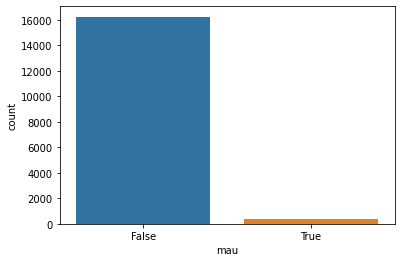

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('demo01.csv')
df.info()
sns.countplot(data=df, x='mau');
df.mau.value_counts()

In [29]:
df.drop_duplicates(inplace=True)
df.shape

(6770, 16)

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.


In [30]:
metadados = pd.DataFrame({'nome': df.columns, 'tipo': df.dtypes})
qtd_categorias = []
for var in df.columns:
  if df[var].dtype == 'object':
    qtd_categorias.append(len(df[var].unique()))
  else:
    qtd_categorias.append(np.nan)
metadados['qtd_categorias'] = qtd_categorias
metadados.reset_index(drop=True)
metadados

,nome,tipo,qtd_categorias
sexo,sexo,object,2.0
posse_de_veiculo,posse_de_veiculo,object,2.0
posse_de_imovel,posse_de_imovel,object,2.0
qtd_filhos,qtd_filhos,int64,NaN
tipo_renda,tipo_renda,object,5.0
educacao,educacao,object,5.0
estado_civil,estado_civil,object,5.0
tipo_residencia,tipo_residencia,object,6.0
idade,idade,float64,NaN
tempo_emprego,tempo_emprego,float64,NaN


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [31]:
df_dummy = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6770 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   float64
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   float64
 8   mau                                     6770 non-null   bool   
 9   sexo_M                                  6770 non-null   uint8  
 10  posse_de_veiculo_Y                      6770 non-null   uin

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [32]:
freq = pd.crosstab(df['posse_de_veiculo'], df['possui_email'])
freq

possui_email,0,1
posse_de_veiculo,,
N,3878,333
Y,2327,232


In [33]:
freq_pct = freq.div(freq.sum(axis=1), axis=0)
freq_pct

possui_email,0,1
posse_de_veiculo,,
N,0.920921,0.079079
Y,0.909340,0.090660


A variável posse_de_veiculo parece ser mais poderosa para prever a probabilidade de mau = 1, já que ela apresenta uma relação mais forte com a variável resposta em comparação com a variável possui_email.

<AxesSubplot:xlabel='posse_de_veiculo'>

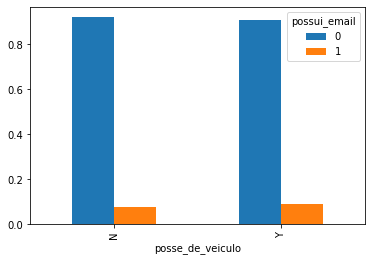

In [34]:
freq_pct.plot.bar()

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [35]:
df_dummy.to_csv('demo01_tratada.csv')